##### 라이브러리 정의

In [10]:
import urllib.parse

import pandas as pd

##### 마켓타입 및 URL 정의

In [11]:
MARKET_CODE_DICT = {

    'kospi': 'stockMkt',

    'kosdaq': 'kosdaqMkt',

    'konex': 'konexMkt'

}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

##### 함수정의 1.[종목코드 6자리]

In [12]:
# 6자리 안되면 0으로 앞을 채워라.
def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6)

    return outValue

##### 함수정의 2.[파일 다운로드]

In [13]:
def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)    

    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
#     06d : 숫자가 없는 칸은 0으로 맞춰줌.
 
    return df

##### 종목코드 가져오기

In [14]:
stocks = get_stock_codes('kospi')

stocks

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,000210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,078930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,KG케미칼,001390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시
...,...,...,...,...,...,...,...,...,...
815,현대위아,011210,자동차 신품 부품 제조업,"자동차부품, 공작기계 등",2011-02-21,12월,정재욱,http://www.hyundai-wia.com,경상남도
816,현대코퍼레이션,011760,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발",1977-12-01,12월,"정몽혁, 김원갑, 장안석(각자대표이사)",http://www.hyundaicorp.co.kr,서울특별시
817,현대코퍼레이션홀딩스,227840,음·식료품 및 담배 도매업,"브랜드사업, 육류유통",2015-10-23,12월,"정몽혁, 김원갑(각자대표이사)",http://www.hyundaicorpholdings.com,서울특별시
818,화신,010690,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도


매수 / 매도 결정 기본 예제 연습

In [15]:
stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)
# 내가 원하는 종목을 가져올 수 있다 ( 여기까지 했다면 )

DL
000210


# 

###  연습문제( 내가 원하는 회사명의 종목코드를 가져오기) ( 11:20 )

In [16]:
# 삼성전자에 해당하는 종목코드를 가져오기 
# 해당 조건식에 맞는 종목코드를 가져오기 

#### 가져올 회사 종목코드 - > 회사명 : 보험업 / 주요제품 : 손해보험 

In [17]:
stocks.dtypes

회사명     object
종목코드    object
업종      object
주요제품    object
상장일     object
결산월     object
대표자명    object
홈페이지    object
지역      object
dtype: object

In [18]:
seek1 = "보험업"
seek2 = "손해보험"

In [19]:
seekCom = stocks.loc[(stocks.업종.str.upper() == seek1) & (stocks.주요제품.str.upper() == seek2)]

In [20]:
seekCom

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
198,흥국화재,000540,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
603,한화손해보험,000370,보험업,손해보험,1975-06-30,12월,강성수,http://www.hwgeneralins.com/,서울특별시


In [21]:
targetColumn = ["종목코드"]

In [22]:
seekStockCode = seekCom.loc[: ,targetColumn]

In [23]:
seekStockCode

,종목코드
198,000540
603,000370


# 

In [24]:
# windosw 에 있는 폰트 가져오기 (폰트가 없으면 한글이 깨져나온다더니, 빨갛게...)

In [25]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from matplotlib import font_manager, rc
import platform

print(platform.system())

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    pass



Windows


In [26]:
end = date.today()
start = date.today() - timedelta(50) # datetime.datetime(2021,4,1) 

STOCK = web.DataReader(stock_code, start, end)
STOCK

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-03-21,59900,60300,59200,59700,28900,0.005051
2022-03-22,59600,60300,59600,59800,38152,0.001675
2022-03-23,59900,60600,59700,60000,37682,0.003344
2022-03-24,59700,59800,58700,59300,61073,-0.011667
2022-03-25,60100,60600,58300,58600,126882,-0.011804
2022-03-28,58600,59900,58000,59800,79034,0.020478
2022-03-29,59900,60800,59600,60000,79852,0.003344
2022-03-30,61000,61000,59000,59400,61849,-0.010000
2022-03-31,59400,61200,59100,61200,75295,0.030303


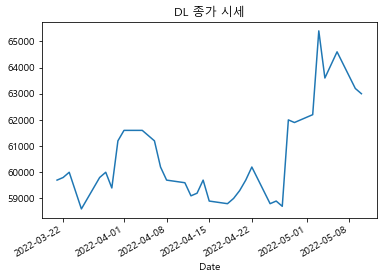

In [27]:
STOCK['Close'].plot()
# print(plt.style.available)
# plt.style.use(['fivethirtyeight'])
plt.title(stock_name+" 종가 시세")
plt.show()

In [28]:
STOCK["MA_5"]=STOCK["Close"].rolling(window=5, min_periods=1).mean() # min_periods=1
STOCK["MA_20"]=STOCK["Close"].rolling(window=20, min_periods=1).mean()
STOCK["diff"]=STOCK["MA_5"]-STOCK["MA_20"]
STOCK.tail()

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2022-05-03,62700,66200,62400,65400,406556,0.051447,62040.0,60125.0,1915.0
2022-05-04,65400,65700,63400,63600,98565,-0.027523,63020.0,60245.0,2775.0
2022-05-06,62800,64800,62300,64600,53968,0.015723,63540.0,60465.0,3075.0
2022-05-09,64000,65300,62700,63200,69646,-0.021672,63800.0,60640.0,3160.0
2022-05-10,62000,63800,60900,63000,84558,-0.003165,63960.0,60810.0,3150.0


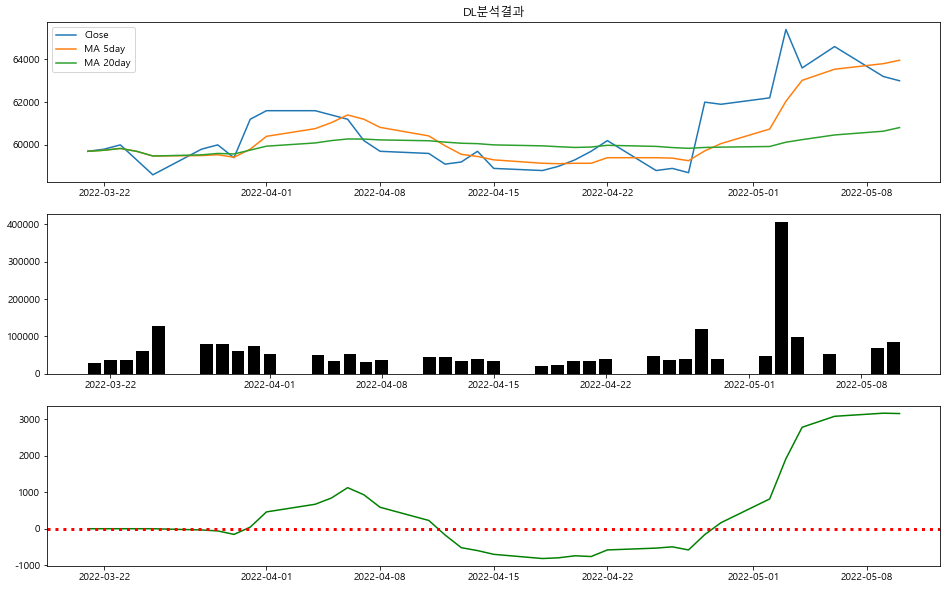

In [29]:

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(STOCK.index, STOCK['Close'], label = 'Close')
plt.plot(STOCK.index, STOCK['MA_5'], label='MA 5day')
plt.plot(STOCK.index, STOCK['MA_20'], label='MA 20day')
plt.title(stock_name+"분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(STOCK.index, STOCK['Volume'], color='black')

#  이동평균 차이 (diff)
plt.subplot(313)
plt.rc('axes', unicode_minus=False)
plt.plot(STOCK.index, STOCK['diff'].fillna(0), color='g')
plt.axhline(y=0, color='r',linestyle=':', linewidth=3) # https://financedata.github.io/posts/matplotlib_hline_and_vline.html

## 캔들 차트 그리기

In [31]:
df = web.DataReader('005930', '2022-01-01', '2022-05-10')
config = {
          'width': 800, 
          'height': 600,
          'volume': True,
}

web.chart.config(config=config)
web.chart.plot(df, title='삼성전자(005930)')

Loading BokehJS ...